<a href="https://colab.research.google.com/github/oopCole/ECGR4105/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [2]:
# Import csv data from my GitHub repo
diabetes_url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework3/diabetes.csv'
cancer_url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework3/cancer.csv'


from sklearn import datasets

dataset = datasets.load_breast_cancer()
X = dataset.data
Y = dataset.target


# Create dataframes for each url
db_df = pd.read_csv(diabetes_url)
cr_df = pd.read_csv(cancer_url)

# Display the first 5 rows of the DataFrame
# print(db_df.head())
cr_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

# Problem 1

In [3]:
# Extract the input and output values
x1 = db_df.iloc[:, :8].values
y1 = db_df.iloc[:, 8].values

# Split the data into training and validation sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, test_size = 0.2, random_state = 0)

# Scale the data using standardization
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

In [4]:
def perform_logistic_regression(x_train, y_train, x_test, y_test):
    """
    Performs logistic regression, making predictions and creating a confusion matrix.
    Also prints the accuracy, precision, recall, and F1 score.

    Parameters:
    x_train : The input data from the training set
    y_train : The output data from the training set
    x_test : The input data from the test set
    y_test : The output data from the test set

    Returns:
    cnf_matrix : A 2D array containing true negative, false positive, false negative, and true positive (in that order)
    """
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Find confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    cnf_matrix

    # Find accuracy, precision, and recall
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 Score:", metrics.f1_score(y_test, y_pred))

    return cnf_matrix


In [5]:
def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    # Visualize the confusion matrix using a heatmap
    class_names=[neg_label, pos_label] # Name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


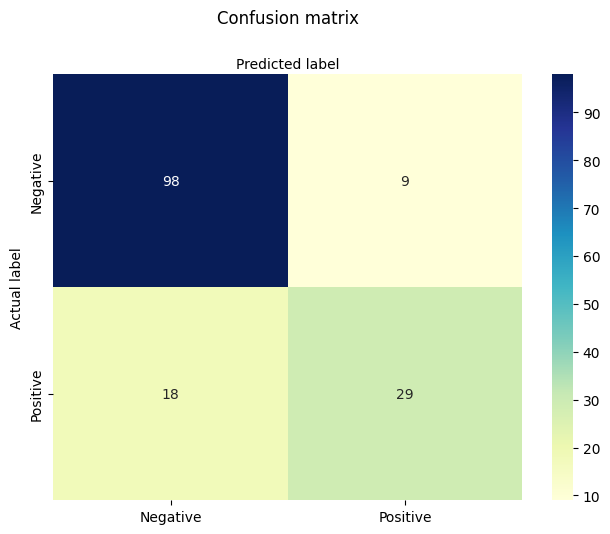

In [6]:
# Perform logistic regression and return confusion matrix
confusion_matrix_1 = perform_logistic_regression(x_train=x1_train, y_train=y1_train, x_test=x1_test, y_test=y1_test)

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_1, neg_label='Negative', pos_label='Positive')

# Problem 2 (a)

In [8]:
# Replacing the Benign and Malignant diagnoses with numbers
cr_df['diagnosis'].replace('B', 0, inplace=True)
cr_df['diagnosis'].replace('M', 1, inplace=True)

# Extract the input and output values
x2 = cr_df.iloc[:, 2:].values
y2 = cr_df.iloc[:, 1].values

# Split the data into training and validation sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2, random_state = 0)

# Scale the data using standardization
sc_x = StandardScaler()
x2_train = sc_x.fit_transform(x2_train)
x2_test = sc_x.transform(x2_test)

print(x2)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


/tmp/ipython-input-3500916928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cr_df['diagnosis'].replace('B', 0, inplace=True)
/tmp/ipython-input-3500916928.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106383


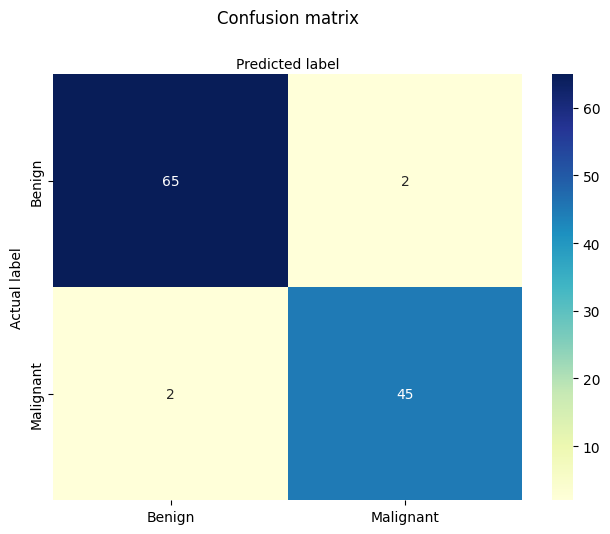

In [9]:
# Perform logistic regression and return confusion matrix
confusion_matrix_2 = perform_logistic_regression(x_train=x2_train, y_train=y2_train, x_test=x2_test, y_test=y2_test)

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_2, neg_label='Benign', pos_label='Malignant')

# Problem 2 (b)


> Add blockquote



In [10]:
# Adding a parameters penalty
C = [10, 5, 1, .1, .001]
x2b_train =  x2_train
x2b_test = x2_test

# Exploring different parameter penalties
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x2b_train, y2_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(x2b_train, y2_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(x2b_test, y2_test))
    print('')

C: 10
Training accuracy:	0.9890
Test accuracy:		0.9474

C: 5
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 1
Training accuracy:	0.9912
Test accuracy:		0.9561

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.001
Training accuracy:	0.6374
Test accuracy:		0.5877



In [12]:
# Selecting the best penalty and making the regression with it
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(x2b_train, y2_train)
y2b_pred = clf.predict(x2b_test)

# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y2_test, y2b_pred))
print("Precision:", metrics.precision_score(y2_test, y2b_pred))
print("Recall:", metrics.recall_score(y2_test, y2b_pred))
print("F1 Score:", metrics.f1_score(y2_test, y2b_pred))

Accuracy: 0.9736842105263158
Precision: 0.9782608695652174
Recall: 0.9574468085106383
F1 Score: 0.967741935483871


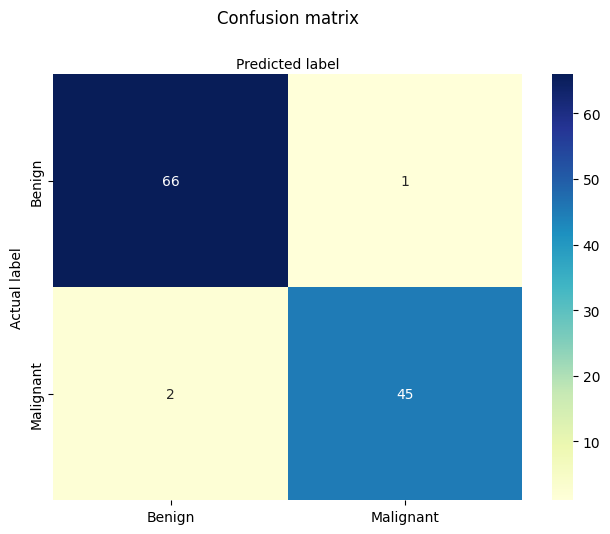

In [13]:
# Find confusion matrix
confusion_matrix_2b = confusion_matrix(y2_test, y2b_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_2b, neg_label='Benign', pos_label='Malignant')